# Introducting P values

## P values are not very reproducible

In the following simulation, multiple data sets are randomly sampled from the same populations. 10 data points are sampled from Gaussians distributions with an SD = 5.0, and the population means differ by 5.0.

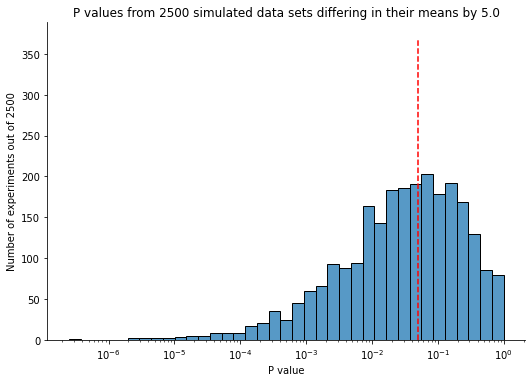

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(111)

mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+5, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
plt.title("P values from 2500 simulated data sets differing in their means by 5.0");


In [2]:
np.percentile(p_values, [2.5, 97.5])

array([1.69152124e-04, 7.02604441e-01])

The middle 95% of the P value range from 0.000169 to 0.7026, a span covering more than three orders of magnitude!

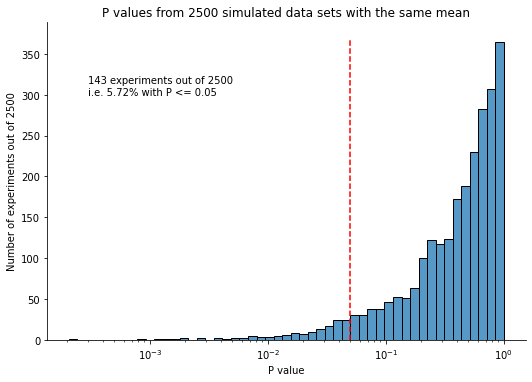

In [3]:
mean = 10
SD   = 5
N    = 10

p_values = []

for _ in range(2500):
    pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
    pop_2 = np.random.normal(loc=mean+0, scale=SD, size=N)

    stat, p_value = stats.ttest_ind(pop_1, pop_2)
    p_values.append(p_value)

sns.displot(p_values, log_scale=True, aspect=1.5)
plt.vlines(.05, 0, 370, colors='r', linestyles='dashed')
plt.xlabel("P value")
plt.ylabel("Number of experiments out of 2500")
signif = sum(np.array(p_values)<=0.05)
plt.text(x=0.0003, y=300, s=f"{signif} experiments out of 2500 \ni.e. {100 * signif / 2500}% with P <= 0.05")
plt.title("P values from 2500 simulated data sets with the same mean");

## Statistical significance and hypothesis testing

Statistical hypothesis testing automates decision-making. It reduces all finding to two conclusions, "statistically significant" or "not statistically significant".

### Type I and type II errors

Statistical hypothesis testing makes a decision based on the results of one comparison. When you make this deicision, there are two kinds of mistakes you can make:

|             | reject H0    | do not reject H0 |
|-------------|--------------|------------------|
| H0 is true  | type I error | (no error)       |
| H0 is false | (no error)   | type II error    |

- type I error: when there really is no difference (or association or correlation) between the populations, random sampling can lead to a difference large enough to be a statistically significant. Also called **false positive**. _E.g. send email to spam folder when good, or verdict guilty when did not commit the crime._
- type II error: when there really is a difference, random sampling (and small sample size) can lead to a difference small enough to be not statistically significant. Also called **falsed negative**. _E.g. place email iin inbox when spam, or verdict not guilty when did commit the crime._

_Another error, called type S error or type III, when the sign of the difference is backwards/reversed._

## Interpreting a result that is statistically significant

|             |  reject H0  | do not reject H0 |  total  |
|-------------|-------------|------------------|---------|
| H0 is true  |  A (type I) |        B         |  A + B  |
| H0 is false |      C      |   D (type II)    |  C + D  |
| Total       |    A + C    |      B + D       | A+B+C+D |

### The significance level ($\alpha$)

* If the null hypothesis is true, what is the probability that a particular experiment will collect data that generate a P value low enough to reject that null hypothesis?
* Of all experiments you could conduct when the null hypothesis is actually true, in what fraction will you reach a conclusion that the results are statistically significant?

The significance level only considers analyses where **H0 is true**. Of all experiments (A+B), the number of times H0 is rejected equals A, so $$ \alpha = \frac{\text{A}}{\text{A}+\text{B}}$$

### The False Positive Report Probability (FPRP)

* If a result is statistically significant, what is the probability that the null hypothesis is really true?
* Of all experiments that reach a statistically significant conclusion, what fraction are _false positive_ (type I error)?

The FPRP only considers analyses that **reject H0**. Of all these experiments (A+C), the number in which H0 is true equals A, so $$ \text{FPRP} = \frac{\text{A}}{\text{A}+\text{C}}$$

## Comparing groups with confidence intervals and P values

If a 95% CI **does not contain the value of the null hypothesis**, then the result must be statistically significant with P < 0.05.
If a 95% CI **does contain the value of H0**, then the result must not be statistically significant with P > 0.05.

Also, if the CI for the difference between two means does not include zero (H0), then the result must be statistically significant (P < 0.05).
If the CI for the ratio of two proportions does not include 1.0 (H0), then the result must be statistically significant (P < 0.05).
If we are comparing a set of percentages against a hypothetical value of 100 and 95% CI of the mean of the percentages does not include 100, the the discrepancy must be statistically significant.

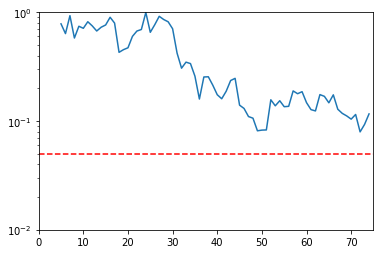

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mean = 0
SD   = 1
N    = 75

pop_1 = np.random.normal(loc=mean, scale=SD, size=N)
pop_2 = np.random.normal(loc=mean, scale=SD, size=N)

p_values = []

for _ in range(5, N):
	subset_1 = pop_1[:_]
	subset_2 = pop_2[:_]
	
	stat, p_value = stats.ttest_ind(subset_1, subset_2)
	p_values.append(p_value)
	
plt.plot([_ for _ in range(5, N)], p_values)
plt.xlim((0,75))
plt.yscale('log')
plt.ylim((.01, 1))
plt.hlines(.05, 0, 75, colors='r', linestyles='dashed')